### NAME: HRISHIKESH SHIVPUTRA KAMBLE
### PROJECT:-
SOLVING CLASSIFICATION PREDICTION FOR "SMART HOME DEVICE USAGE" DATASET USING "LOGISTIC REGRESSION","SVC","GAUSSIAN NB","BERNOULLI NB","COMPLEMENT NB","MULTINOMIAL NB","K NEAREST NEIGHBOUR","DECISION TREE CLASSIFIER","ADABOOST","BAGGING","ANN".

### APPROACH:

1.LOAD THE REQUIRED LIBRARIES SUCH AS PANDAS,MATPLOTLIB,SEABORN ALONG WITH GIVEN DATASET.

2.PERFORM EDA ON THE GIVEN DATASET.

3.CONVERT ALL THE REQUIRED COLUMNS INTO NUMERIAL COLUMNS USING GET DUMMIES FUNCTION FROM PANDAS LIBRARY.

4.CONVERTING ALL REQUIRED FEATURES IN NUMERIAL , CHECK FOR CORRELATION BETWEEN FEATURES AND TARGET AND CONSIDER THE ONLY FEATURES WITH HIGHER CORRELATION.

5.IMPORT "LOGISTIC REGRESSION","SVC","GAUSSIAN NB","BERNOULLI NB","COMPLEMENT NB","MULTINOMIAL NB","K NEAREST NEIGHBOUR","DECISION TREE CLASSIFIER","ADABOOST","BAGGING","ANN", AND SPLIT THE GIVEN DATASET INTO TRAINING AND TESTING DATA USING TRAIN_TEST_SPLIT FUNCTION.THEN CALCULATE ACCURACY SCORE USING SKLEARN LIBRARY BY IMPORTING METRICS.

6.ONCE WE GET ACCURACY SCORE OF ALL MODELS FOR BOTH TRAING AND TESTING DATA, CREATE A DATAFRAME AND LOAD ALL THE ACCURACY OF ALL MODEL.

7.VISUALIZATION:
   ONCE THE DATASET IS CREATED PLOT THE ACCURACIES OF ALL THE MODELS USING BARPLOT USING MATPLOTLIB.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.Max_columns",100)

C:\Users\Hrishikesh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv(r"C:\Users\Hrishikesh\Desktop\DATA SCIENCE\smart_home_device_usage_data.csv")
data

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1
...,...,...,...,...,...,...,...,...
5398,5399,Thermostat,4.556314,5.871764,1,0,28,0
5399,5400,Lights,0.561856,1.555992,1,4,24,0
5400,5401,Smart Speaker,11.096236,7.677779,0,0,42,0
5401,5402,Security System,8.782169,7.467929,0,2,28,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [4]:
data.shape

(5403, 8)

In [5]:
data.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [6]:
data.isna().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [7]:
data["DeviceType"].unique()

array(['Smart Speaker', 'Camera', 'Security System', 'Thermostat',
       'Lights'], dtype=object)

In [8]:
b=data["DeviceType"].value_counts().reset_index()
b

,DeviceType,count
0,Smart Speaker,1108
1,Camera,1101
2,Lights,1087
3,Security System,1068
4,Thermostat,1039


In [9]:
data.columns

Index(['UserID', 'DeviceType', 'UsageHoursPerDay', 'EnergyConsumption',
       'UserPreferences', 'MalfunctionIncidents', 'DeviceAgeMonths',
       'SmartHomeEfficiency'],
      dtype='object')

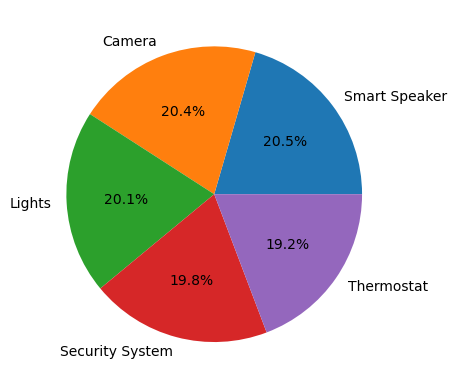

In [10]:
plt.pie(b["count"],labels=b["DeviceType"],autopct="%1.1f%%")
plt.show()

#### THE ABOVE PIECHART SHOWS THE DISTRIBUTION OF DEVICE TYPES.

In [11]:
data=data[['DeviceType', 'UsageHoursPerDay', 'EnergyConsumption',
       'UserPreferences', 'MalfunctionIncidents', 'DeviceAgeMonths',
       'SmartHomeEfficiency']]
data

,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,Smart Speaker,15.307188,1.961607,1,4,36,1
1,Camera,19.973343,8.610689,1,0,29,1
2,Security System,18.911535,2.651777,1,0,20,1
3,Camera,7.011127,2.341653,0,3,15,0
4,Camera,22.610684,4.859069,1,3,36,1
...,...,...,...,...,...,...,...
5398,Thermostat,4.556314,5.871764,1,0,28,0
5399,Lights,0.561856,1.555992,1,4,24,0
5400,Smart Speaker,11.096236,7.677779,0,0,42,0
5401,Security System,8.782169,7.467929,0,2,28,1


In [12]:
n=pd.get_dummies(data["DeviceType"],drop_first=True).replace({True:1,False:0})
n

,Lights,Security System,Smart Speaker,Thermostat
0,0,0,1,0
1,0,0,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
5398,0,0,0,1
5399,1,0,0,0
5400,0,0,1,0
5401,0,1,0,0


In [13]:
data=pd.concat([data,n],axis=1).drop(columns="DeviceType")

In [14]:
data=data[['UsageHoursPerDay', 'EnergyConsumption', 'UserPreferences',
       'MalfunctionIncidents', 'DeviceAgeMonths',
       'Lights', 'Security System', 'Smart Speaker', 'Thermostat', 'SmartHomeEfficiency']]

In [15]:
data

,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,Lights,Security System,Smart Speaker,Thermostat,SmartHomeEfficiency
0,15.307188,1.961607,1,4,36,0,0,1,0,1
1,19.973343,8.610689,1,0,29,0,0,0,0,1
2,18.911535,2.651777,1,0,20,0,1,0,0,1
3,7.011127,2.341653,0,3,15,0,0,0,0,0
4,22.610684,4.859069,1,3,36,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5398,4.556314,5.871764,1,0,28,0,0,0,1,0
5399,0.561856,1.555992,1,4,24,1,0,0,0,0
5400,11.096236,7.677779,0,0,42,0,0,1,0,0
5401,8.782169,7.467929,0,2,28,0,1,0,0,1


In [16]:
data.corr()

,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,Lights,Security System,Smart Speaker,Thermostat,SmartHomeEfficiency
UsageHoursPerDay,1.000000,0.026253,0.002161,0.015126,0.025132,-0.000026,-0.002724,-0.005574,0.003834,0.183065
EnergyConsumption,0.026253,1.000000,0.016709,-0.000894,-0.016691,-0.001642,0.014465,-0.032159,0.015264,-0.178467
UserPreferences,0.002161,0.016709,1.000000,0.002154,-0.013781,0.002517,-0.007951,0.007316,-0.009124,0.608713
MalfunctionIncidents,0.015126,-0.000894,0.002154,1.000000,-0.027023,-0.015969,-0.006193,-0.010185,0.025397,-0.120836
DeviceAgeMonths,0.025132,-0.016691,-0.013781,-0.027023,1.000000,-0.011805,0.005075,0.008420,0.006678,-0.197077
Lights,-0.000026,-0.001642,0.002517,-0.015969,-0.011805,1.000000,-0.249095,-0.254896,-0.244872,0.003420
Security System,-0.002724,0.014465,-0.007951,-0.006193,0.005075,-0.249095,1.000000,-0.252104,-0.242190,-0.001203
Smart Speaker,-0.005574,-0.032159,0.007316,-0.010185,0.008420,-0.254896,-0.252104,1.000000,-0.247830,0.011996
Thermostat,0.003834,0.015264,-0.009124,0.025397,0.006678,-0.244872,-0.242190,-0.247830,1.000000,-0.025521
SmartHomeEfficiency,0.183065,-0.178467,0.608713,-0.120836,-0.197077,0.003420,-0.001203,0.011996,-0.025521,1.000000


<Axes: >

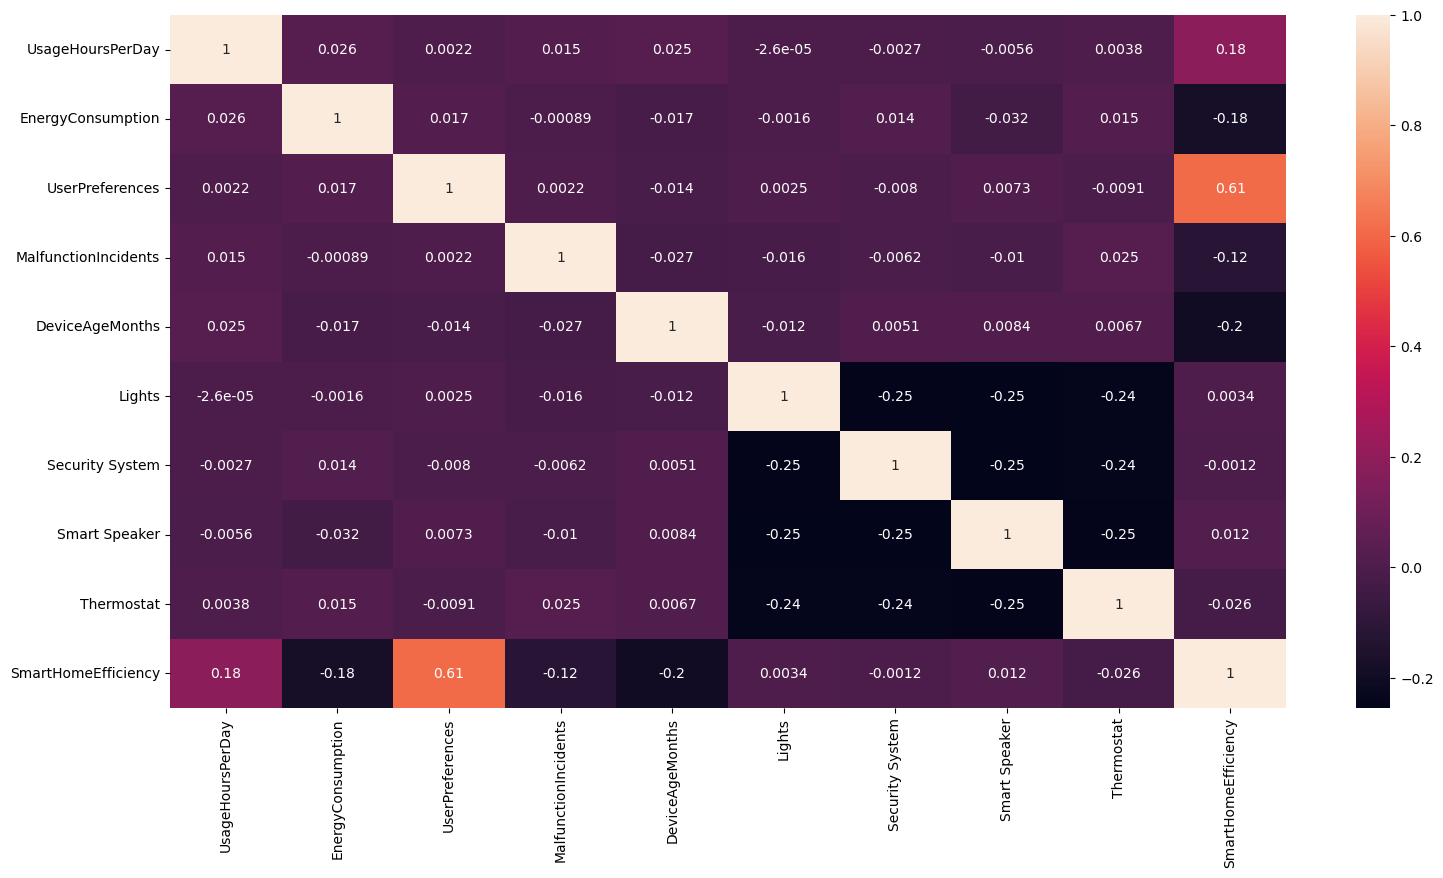

In [17]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),annot=True)

## MACHINE LEARNING:-

In [18]:
features=data[['UsageHoursPerDay', 'EnergyConsumption', 'UserPreferences',
       'MalfunctionIncidents', 'DeviceAgeMonths',
       'Lights', 'Security System', 'Smart Speaker', 'Thermostat']]
target=data['SmartHomeEfficiency']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target)

### LOGISTIC REGRESSION:-

In [20]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
L.fit(x_train,y_train)

LogisticRegression()

In [21]:
L1=L.score(x_train,y_train)*100
L1

87.24086870681145

In [22]:
L2=L.score(x_test,y_test)*100
L2

87.71280532938565

### SUPPORT VECTOR CLASSIFIER:-


In [23]:
from sklearn.svm import SVC
S=SVC()
S.fit(x_train,y_train)

SVC()

In [24]:
S1=S.score(x_train,y_train)*100
S1

83.21816386969397

In [25]:
S2=S.score(x_test,y_test)*100
S2

82.08734270910438

### KNN:-

In [26]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier()
K.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
K1=K.score(x_train,y_train)*100
K1

83.24284304047383

In [28]:
K2=K.score(x_test,y_test)*100
K2

71.50259067357513

### NAVIES BAYES:-

In [29]:
from sklearn.naive_bayes import ComplementNB,BernoulliNB,MultinomialNB,GaussianNB

In [30]:
C=ComplementNB()
B=BernoulliNB()
G=GaussianNB()
M=MultinomialNB()

#### ComplementNB:-

In [31]:
C.fit(x_train,y_train)

ComplementNB()

In [32]:
C1=C.score(x_train,y_train)*100
C1

68.06515301085884

In [33]:
C2=C.score(x_test,y_test)*100
C2

67.9496669133975

#### BernoulliNB:-

In [34]:
B.fit(x_train,y_train)

BernoulliNB()

In [35]:
B1=B.score(x_train,y_train)*100
B1

79.14610069101678

In [36]:
B2=B.score(x_test,y_test)*100
B2

79.34863064396744

#### GaussianNB:-

In [37]:
G.fit(x_train,y_train)

GaussianNB()

In [38]:
G1=G.score(x_train,y_train)*100
G1

83.21816386969397

In [39]:
G2=G.score(x_test,y_test)*100
G2

83.4937083641747

#### MultinomialNB:-

In [40]:
M.fit(x_train,y_train)

MultinomialNB()

In [41]:
M1=M.score(x_train,y_train)*100
M1

69.69397828232971

In [42]:
M2=M.score(x_test,y_test)*100
M2

69.94818652849742

### DECISION TREE:-

In [43]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()
D.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
D1=D.score(x_train,y_train)*100
D1

100.0

In [45]:
D2=D.score(x_test,y_test)*100
D2

91.85788304959289

### ENSEMBLE:-

#### ADABOAST:-

In [46]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,StackingClassifier,RandomForestClassifier
A=AdaBoostClassifier()
A.fit(x_train,y_train)

AdaBoostClassifier()

In [47]:
A1=A.score(x_train,y_train)*100
A1

94.54590325765054

In [48]:
A2=A.score(x_test,y_test)*100
A2

94.52257586972614

#### BAGGING:-

In [49]:
b=BaggingClassifier()
b.fit(x_train,y_train)

BaggingClassifier()

In [50]:
b1=b.score(x_train,y_train)*100
b1

98.81539980256665

In [51]:
b2=b.score(x_test,y_test)*100
b2

94.74463360473723

### DEEP LEARNING:-

In [52]:
import tensorflow
from tensorflow import keras

In [53]:
model=keras.Sequential([
    keras.layers.Dense(8,input_shape=(9,),activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(12,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [54]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.5907 - loss: 0.7091
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.6562 - loss: 0.6104
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.6625 - loss: 0.6048
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7099 - loss: 0.5644
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7318 - loss: 0.5387
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.7974 - loss: 0.4962
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8324 - loss: 0.4389
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.8582 - loss: 0.3954
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8689 - loss: 0.3499
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.8731 - loss: 0.3461
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8647 - loss: 0.3510
Epoch 12/50
127/127 ━━━━━━━━━━

In [55]:
T=model.predict(x_test)
T

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.8194479 ],
       [0.16767004],
       [0.50828475],
       ...,
       [0.03387482],
       [0.8636771 ],
       [0.51185   ]], dtype=float32)

In [56]:
pred=[]

In [57]:
for i in T:
    if i>.5:
        pred.append(1)
    else:
        pred.append(0)

In [58]:
pred

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

accuracy_score(y_test,pred)*100


89.04515173945225

In [60]:
confusion_matrix(y_test,pred)

array([[784,  58],
       [ 90, 419]], dtype=int64)

In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       842
           1       0.88      0.82      0.85       509

    accuracy                           0.89      1351
   macro avg       0.89      0.88      0.88      1351
weighted avg       0.89      0.89      0.89      1351



In [62]:
train=model.evaluate(x_train,y_train)[1]*100
train

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8932 - loss: 0.3058


88.69693875312805

In [63]:
test=model.evaluate(x_test,y_test)[1]*100
test

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.8906 - loss: 0.3166


89.04514908790588

### ACCURACY GRAPH:-

In [64]:
A={"METHODS":["LOGISTIC REGRESSION","SVC","GAUSSIAN NB","BERNOULLI NB","COMPLEMENT NB","MULTINOMIAL NB","K NEAREST NEIGHBOUR","Decision Tree Classifier","ADABOOST","BAGGING","ANN"],"TRAIN ACCURACY":[L1,S1,G1,B1,C1,M1,K1,D1,A1,b1,train],"TEST ACCURACY":[L2,S2,G2,B2,C2,M2,K2,D2,A2,b2,test]}
A=pd.DataFrame(A)
A=np.around(A,2)
A          

,METHODS,TRAIN ACCURACY,TEST ACCURACY
0,LOGISTIC REGRESSION,87.24,87.71
1,SVC,83.22,82.09
2,GAUSSIAN NB,83.22,83.49
3,BERNOULLI NB,79.15,79.35
4,COMPLEMENT NB,68.07,67.95
5,MULTINOMIAL NB,69.69,69.95
6,K NEAREST NEIGHBOUR,83.24,71.50
7,Decision Tree Classifier,100.00,91.86
8,ADABOOST,94.55,94.52
9,BAGGING,98.82,94.74


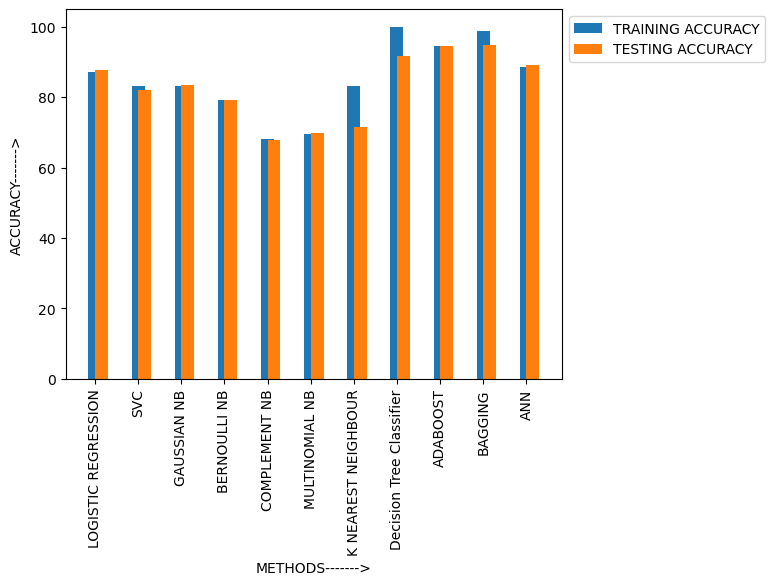

In [65]:
plt.bar(A["METHODS"],A["TRAIN ACCURACY"],width=0.3,label="TRAINING ACCURACY")                  
plt.bar(A["METHODS"],A["TEST ACCURACY"],align="edge",width=0.3,label="TESTING ACCURACY")
plt.legend(bbox_to_anchor=[1,0,0,1])
plt.xlabel("METHODS------->")
plt.ylabel("ACCURACY------->")
plt.xticks(rotation=90)
plt.show()

## CONCLUSION:
### FROM THE ABOVE BAR CHART IT IS CLEAR THAT LOGISTIC REGRESSION AND ADABOAST ARE BEST FOR CLASSIFICATION FOR THIS DATASET .